# <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>UNSW_NB 15_00 dataset using CNN Modelling</b>

In the rapidly evolving realm of cybersecurity, staying ahead of emerging threats is of utmost importance. One of the cornerstones in achieving this objective is the availability of comprehensive and high-quality datasets for research and development in the field of network security. The "UNSW-NB15" dataset stands as a pivotal resource that addresses this need, offering a wealth of network traffic data to support the advancement of intrusion detection and cybersecurity solutions.

The UNSW-NB15 dataset is a testament to the commitment of the cybersecurity community to bolster defenses against a myriad of cyber threats. It provides a meticulously curated collection of network traffic samples, each reflecting various aspects of modern network activities, including normal behaviors and a wide spectrum of cyberattacks. This dataset is instrumental in the development and evaluation of intrusion detection systems, machine learning models, and security algorithms.


#### About Project

• We will employ a Convolutional Neural Network (CNN) architecture to construct both binary and multiclass classification models for detecting network attacks, with a specific focus on Drive-by Download Attacks.


• Our approach will involve creating a framework for designing Network Intrusion Detection System (NIDS) models tailored to this purpose.


• To implement these models, we will leverage TensorFlow, a prominent Python library renowned for its capabilities in deep learning model development.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

    
1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Cleaning](#DataCleaning)
5. [Exploratory Data Analysis](#EDA)
6. [Preprocess dataset](#Preprocess)
7. [Model Building](#Modelling)
    

<a name="Libraries"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>1. Importing libraries</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fastai.tabular.all import df_shrink
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight


<a name="Data"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>2. Loading data</b>

In [2]:
df_train= pd.read_csv(r'C:\Users\ADMIN\Documents\Networkdetection\UNSW_NB15\UNSW_NB15_training-set.csv')
df_test = pd.read_csv(r'C:\Users\ADMIN\Documents\Networkdetection\UNSW_NB15\UNSW_NB15_testing-set.csv')

In [3]:
#The id column will be dropped since it's a metadata
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

The data types are either non-specific or too large by default. An inconvenience of working with CSV files.

Hence was shrinked using a fastai function [df_shrink](https://docs.fast.ai/tabular.core.html#df_shrink).

In [4]:
df_train.dtypes

dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [5]:
df_train = df_shrink(df_train, skip=[], obj2cat=True, int2uint=False)
df_test = df_shrink(df_test, skip=[], obj2cat=True, int2uint=False)

The dataset has been shrinked and now there's about 66% reduction in disk space for this dataset. Hence increase in speed while loading dataset.

<a name="Statistics"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>3. Statistical summaries</b>

In [6]:
df_train.dtypes

dur                   float32
proto                category
service              category
state                category
spkts                   int16
dpkts                   int16
sbytes                  int32
dbytes                  int32
rate                  float32
sttl                    int16
dttl                    int16
sload                 float32
dload                 float32
sloss                   int16
dloss                   int16
sinpkt                float32
dinpkt                float32
sjit                  float32
djit                  float32
swin                    int16
stcpb                   int64
dtcpb                   int64
dwin                    int16
tcprtt                float32
synack                float32
ackdat                float32
smean                   int16
dmean                   int16
trans_depth             int16
response_body_len       int32
ct_srv_src               int8
ct_state_ttl             int8
ct_dst_ltm               int8
ct_src_dpo

In [7]:
df_test.dtypes

dur                   float32
proto                category
service              category
state                category
spkts                   int16
dpkts                   int16
sbytes                  int32
dbytes                  int32
rate                  float32
sttl                    int16
dttl                    int16
sload                 float32
dload                 float32
sloss                   int16
dloss                   int16
sinpkt                float32
dinpkt                float32
sjit                  float32
djit                  float32
swin                    int16
stcpb                   int64
dtcpb                   int64
dwin                    int16
tcprtt                float32
synack                float32
ackdat                float32
smean                   int16
dmean                   int16
trans_depth             int16
response_body_len       int32
ct_srv_src               int8
ct_state_ttl             int8
ct_dst_ltm               int8
ct_src_dpo

<a name="DataCleaning"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>4. Data Cleaning</b>

In [8]:
# Check for missing values
df_train.isnull().sum().any(),df_test.isnull().sum().any()

(False, False)

In [9]:
df_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,254,...,1,3,0,0,0,2,3,0,Normal,0


In [10]:
df_test.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,254,...,1,40,0,0,0,2,39,0,Normal,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                82332 non-null  float32 
 1   proto              82332 non-null  category
 2   service            82332 non-null  category
 3   state              82332 non-null  category
 4   spkts              82332 non-null  int16   
 5   dpkts              82332 non-null  int16   
 6   sbytes             82332 non-null  int32   
 7   dbytes             82332 non-null  int32   
 8   rate               82332 non-null  float32 
 9   sttl               82332 non-null  int16   
 10  dttl               82332 non-null  int16   
 11  sload              82332 non-null  float32 
 12  dload              82332 non-null  float32 
 13  sloss              82332 non-null  int16   
 14  dloss              82332 non-null  int16   
 15  sinpkt             82332 non-null  float32 
 16  dinp

In [12]:
df_train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,82410.890625,180.967667,95.713003,6.454902e+07,6.305469e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.709841,133.916353,115.574086,1.716423e+05,1.514715e+05,148654.421875,101.513358,116.667722,1.798863e+08,2.393292e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2650.176758,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,111111.109375,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1000000.000000,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [13]:
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [14]:
# Check for duplicates
df_train.duplicated().any(),df_test.duplicated().any()

(True, True)

In [15]:
df_train.drop_duplicates(inplace=True),df_test.drop_duplicates(inplace=True)

(None, None)

In [16]:
df_train.duplicated().any(), df_test.duplicated().any()

(False, False)

In [17]:
# Check size and shape of datasets
df_train.shape,df_test.shape

((55945, 44), (107740, 44))

In [18]:
df_train.label.value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
82319    0
82322    0
82323    0
82327    0
82328    0
Name: label, Length: 55945, dtype: int8>

In [19]:
df_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,254,...,1,3,0,0,0,2,3,0,Normal,0


<a name="EDA"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b> 5. Exploratory Data Analysis</b>

<Axes: title={'center': 'Distrbution of Target Value'}, xlabel='label'>

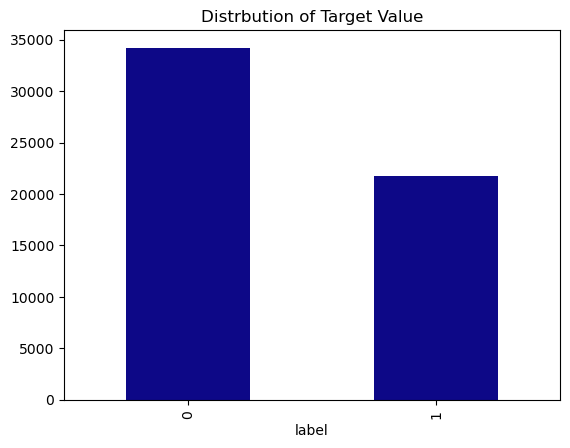

In [20]:
df_train['label'].value_counts().plot(kind = 'bar', 
                                        title = 'Distrbution of Target Value', 
                                        cmap = 'plasma')

<Axes: title={'center': 'Distrbution of attack Value'}, xlabel='attack_cat'>

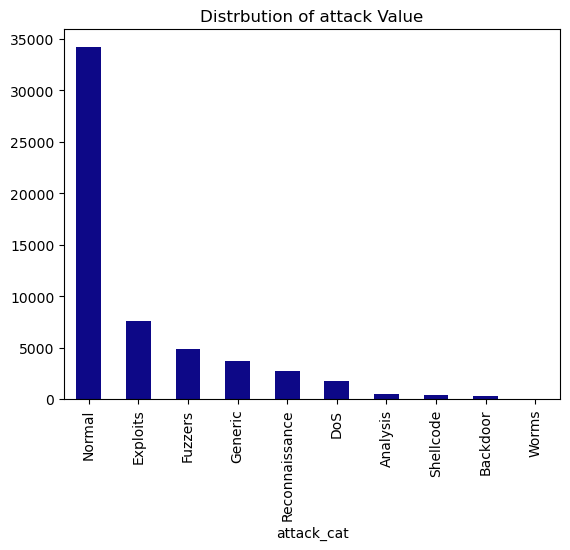

In [21]:
df_train['attack_cat'].value_counts().plot(kind = 'bar', 
                                        title = 'Distrbution of attack Value', 
                                        cmap = 'plasma')

In [22]:
def pie_plot(df_train, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols,figsize=(18, 18))
    colors = plt.cm.Set3(np.linspace(0, 1, len(cols_list)))  # Custom color palette

    for ax, col, color in zip(axes.ravel(), cols_list, colors):
        counts = df_train[col].value_counts()
        wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.0f%%', colors=plt.cm.Set3(np.random.rand(len(counts)))) 
        ax.set_title(str(col), fontsize=15)
        plt.setp(autotexts, size=10)  # Set font size for autopct labels
        
    plt.show()

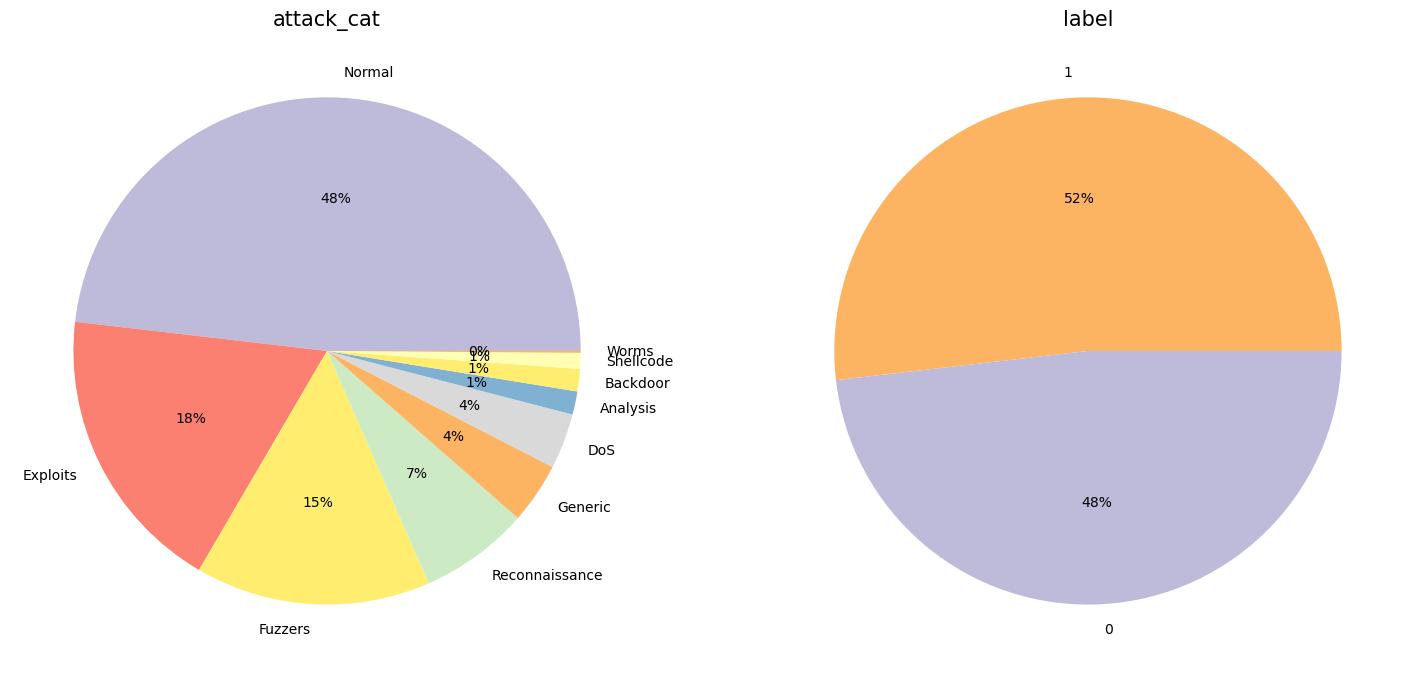

In [23]:
pie_plot(df_test, ['attack_cat', 'label'], 1, 2)

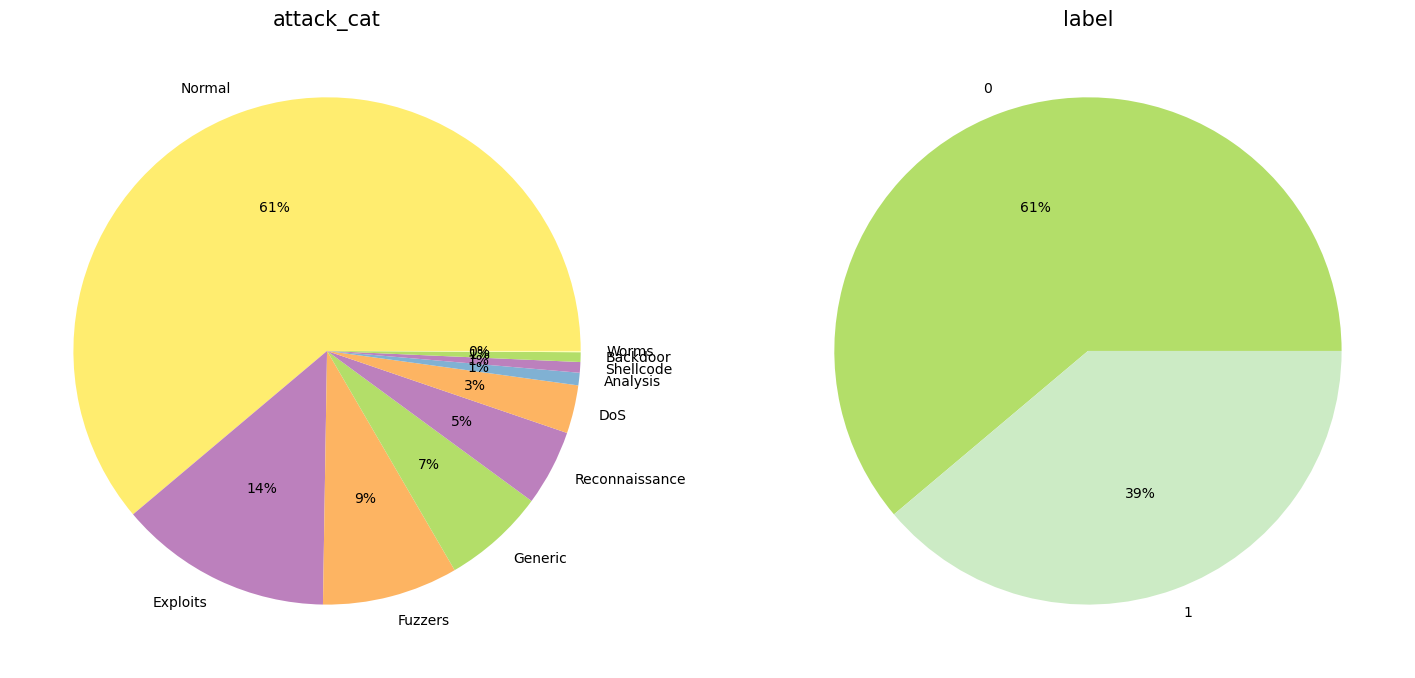

In [24]:
pie_plot(df_train, ['attack_cat', 'label'], 1, 2)

This dataset is not blanced

### Correlation EDA

Text(0.5, 1.0, 'Correlogram')

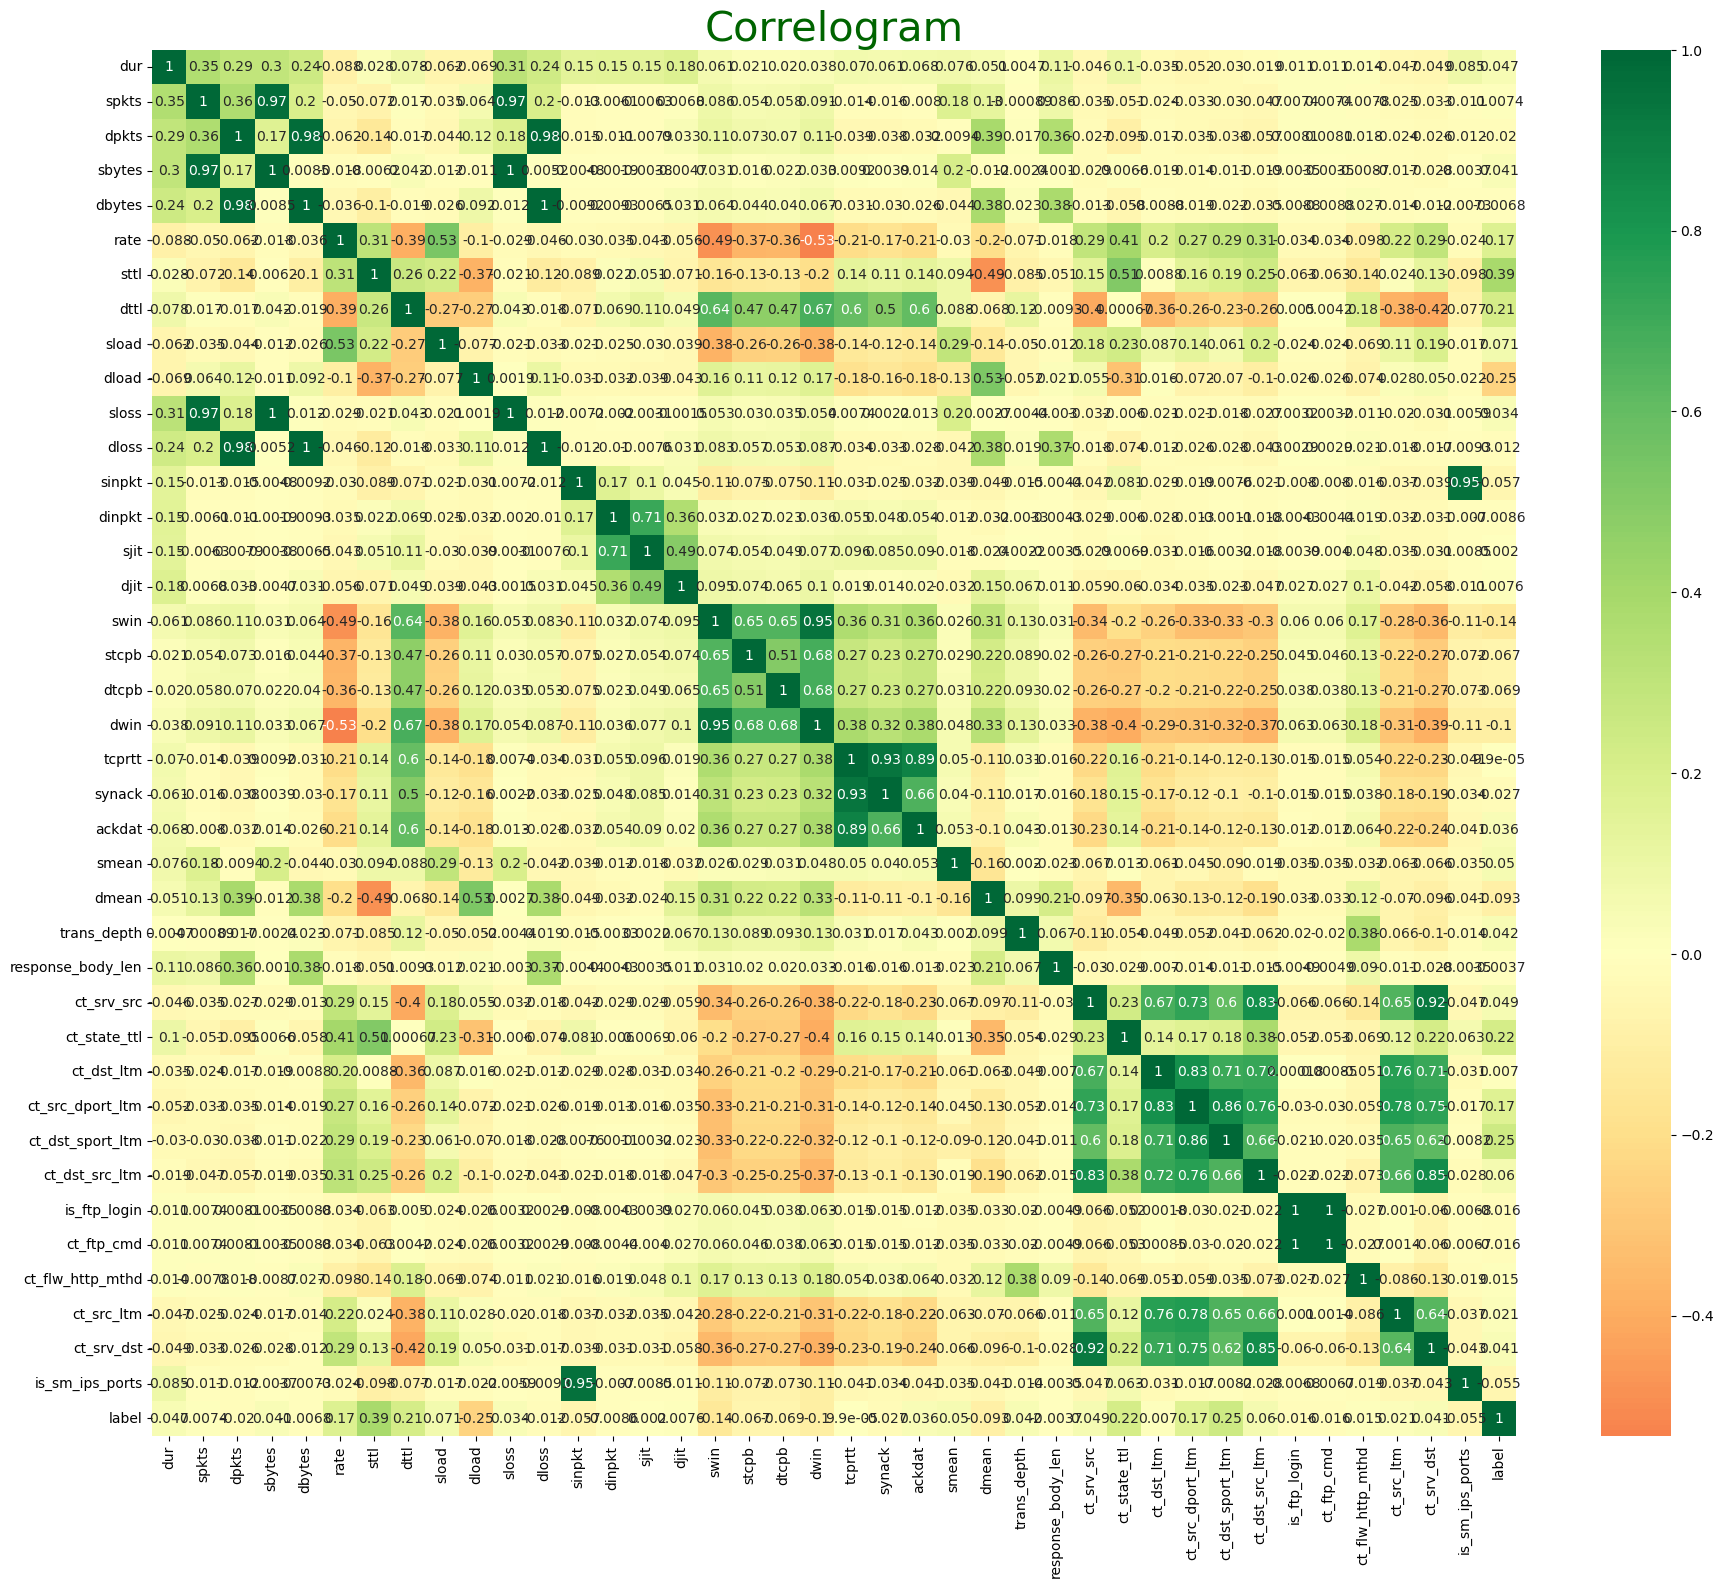

In [25]:
# Quantify correlations
numeric_columns = df_train.select_dtypes(include=np.number)
corr = numeric_columns.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(corr, cmap='RdYlGn', annot=True, center=0)
plt.title('Correlogram', fontsize=30, color='darkgreen')

<a name="Preprocess"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>  6. Preprocessing Dataset</b>

In [26]:
RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = df_train
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df["label"].value_counts().values[0:1],
           x=['Normal'],
           text = df["label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Attack', 
           y=df["label"].value_counts().values[1:2],
           x=['Attack'],
           text = df["label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)


### Balancing the dataset

In [27]:
df1 = df[df["label"] == 0][:21000]
df2 = df[df["label"] == 1][:21000]
df_equal = pd.concat([ df1,df2], axis =0)

The dataset was balanced by creating two DataFrames df1 and df2, each containing the first 21,000 rows of class 0 and class 1, respectively. Then, it concatenates df1 and df2 to form df_equal, resulting in a balanced DataFrame with an equal number of rows for both class labels. This ensures fair representation of both classes during model training.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [29]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df_equal["label"].value_counts().values[0:1],
           x=['Normal'],
           text = df_equal["label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Attack', 
           y=df_equal["label"].value_counts().values[1:2],
           x=['Attack'],
           text = df_equal["label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [30]:
df_equal.shape, df_train.shape

((42000, 44), (55945, 44))

The dataset has been balanced, now we can proceed with our Modelling

## Best Features

In [89]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df_equal.iloc[:,4:-2]
y = df_equal.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

In [91]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df_equal.iloc[:,4:-2]
y = df_equal.iloc[:,-1]
fit = best_features.fit(X,y)

# Fit SelectKBest with chi2 score function
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# Calculate the sum of all feature scores
total_score = fit.scores_.sum()

# Calculate the percentage contribution of each feature to the total score
feature_scores_percentage = (fit.scores_ / total_score) * 100

# Create a DataFrame for feature scores and percentages
feature_score_percentage_df = pd.DataFrame({
    'feature': X.columns,
    'score': fit.scores_,
    'percentage': feature_scores_percentage
})

# Sort the DataFrame by percentage in descending order
feature_score_percentage_df.sort_values(by='percentage', ascending=False, inplace=True)

# Display the top 20 features and their percentages
top_features_df = feature_score_percentage_df.head(22)
print(top_features_df)

# Visualize the results as a bar chart
fig = go.Figure(go.Bar(
    x=top_features_df['percentage'],
    y=top_features_df['feature'],
    orientation='h'))

fig.update_layout(
    title="Top 20 Features by Percentage Contribution",
    height=1200,
    showlegend=False,
)

              feature         score  percentage
7               sload  6.139488e+11   61.924144
16              stcpb  1.675019e+11   16.894588
17              dtcpb  1.610290e+11   16.241717
8               dload  4.774472e+10    4.815631
4                rate  8.366361e+08    0.084385
2              sbytes  2.489906e+08    0.025114
3              dbytes  9.606144e+07    0.009689
13               sjit  2.619668e+07    0.002642
25  response_body_len  1.070626e+07    0.001080
11             sinpkt  5.919615e+06    0.000597
5                sttl  1.535769e+06    0.000155
6                dttl  1.026545e+06    0.000104
23              dmean  1.006948e+06    0.000102
22              smean  1.420324e+05    0.000014
1               dpkts  1.218417e+05    0.000012
12             dinpkt  5.882412e+04    0.000006
10              dloss  4.618282e+04    0.000005
15               swin  3.705342e+04    0.000004
9               sloss  2.899703e+04    0.000003
18               dwin  2.432506e+04    0

In [87]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k='all')

X = df_equal.iloc[:, 4:-2]
y = df_equal.iloc[:, -1]
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)

feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.columns = ['feature', 'score']

# Sort the features by score in ascending order
feature_score.sort_values(by=['score'], ascending=True, inplace=True)

# Display the feature names and scores in a tabular format
print(feature_score)


              feature         score
36         ct_srv_dst  2.938040e+01
32       is_ftp_login  4.104310e+01
33         ct_ftp_cmd  4.360128e+01
37    is_sm_ips_ports  1.420000e+02
20             synack  1.630150e+02
26         ct_srv_src  1.871808e+02
35         ct_src_ltm  1.997556e+02
34   ct_flw_http_mthd  2.129417e+02
21             ackdat  2.565396e+02
24        trans_depth  3.839675e+02
19             tcprtt  4.138422e+02
28         ct_dst_ltm  6.318178e+02
14               djit  6.763582e+03
31     ct_dst_src_ltm  7.470407e+03
29   ct_src_dport_ltm  9.379198e+03
0               spkts  1.128361e+04
30   ct_dst_sport_ltm  1.129832e+04
27       ct_state_ttl  1.148691e+04
18               dwin  2.432506e+04
9               sloss  2.899703e+04
15               swin  3.705342e+04
10              dloss  4.618282e+04
12             dinpkt  5.882412e+04
1               dpkts  1.218417e+05
22              smean  1.420324e+05
23              dmean  1.006948e+06
6                dttl  1.026

In [32]:
df_equal["attack_cat"].unique()

['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits', 'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

<a name="Modelling"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b> 7. Modelling</b>

In [67]:
# Function to plot confusion matrix with numbers
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Display the number of samples in each cell
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Buiding CNN Model for both Multiclass and Binary classification

In [34]:
df_equal['label'].nunique(),df_equal['attack_cat'].nunique()

(2, 10)

### Multiclass Classification for CNN Modelling

In [35]:
# Multiclass Classification: Label Encoding for multiclass classification
label_encoder = LabelEncoder()
object_columns = ["proto", "service", "state", "attack_cat"]
for col in object_columns:
    df_equal[col] = label_encoder.fit_transform(df_equal[col])
    df_test[col] = label_encoder.fit_transform(df_test[col])

# Separate features and labels for multiclass classification
X_multiclass = df_equal.drop(['label', 'attack_cat'], axis=1)
y_multiclass = df_equal['attack_cat']

# Convert the labels to one-hot encoded vectors for multiclass
y_multiclass = to_categorical(y_multiclass, num_classes=len(df_equal['attack_cat'].unique()))

# Normalize the data using Min-Max normalization
scaler = MinMaxScaler()
X_multiclass = scaler.fit_transform(X_multiclass)

This code prepares data for multiclass classification. It encodes categorical features using LabelEncoder, converts the labels to one-hot encoded vectors, normalizes the features with Min-Max scaling, and separates the features and target labels for training. The resulting data is ready for training a multiclass classification model.

In [36]:
# Reshape the input data for the Conv1D layer
X_multiclass = X_multiclass.reshape(X_multiclass.shape[0], X_multiclass.shape[1], 1)

# Splitting the multiclass dataset into training (70%) and testing (30%) sets
X_train_multiclass, X_val_multiclass, y_train_multiclass, y_val_multiclass = train_test_split(
    X_multiclass, y_multiclass, test_size=0.3, random_state=42
)



In [37]:
# Print the shape of each set
print("X_train shape:", X_train_multiclass.shape)
print("X_val shape:", X_val_multiclass.shape)
print("y_train shape:", y_train_multiclass.shape)
print("y_val shape:", y_val_multiclass.shape)

X_train shape: (29400, 42, 1)
X_val shape: (12600, 42, 1)
y_train shape: (29400, 10)
y_val shape: (12600, 10)


In [38]:
# Multiclass Classification CNN Model Architecture
multiclass_model = Sequential()
multiclass_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_multiclass.shape[1], 1)))
multiclass_model.add(MaxPooling1D(pool_size=2))
multiclass_model.add(Flatten())
multiclass_model.add(Dense(128, activation='relu'))
multiclass_model.add(Dropout(0.5))
multiclass_model.add(Dense(len(df_train['attack_cat'].unique()), activation='softmax'))

# Compile the multiclass classification model
multiclass_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [39]:
import kerastuner
from kerastuner.tuners import RandomSearch

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6072\2204103786.py:1: DeprecationWarning:

`import kerastuner` is deprecated, please use `import keras_tuner`.



In [40]:
# Training for Multiclass Classification
multiclass_history = multiclass_model.fit(
    X_train_multiclass, y_train_multiclass, validation_data=(X_val_multiclass, y_val_multiclass), epochs=20, batch_size=64
)



Epoch 1/20
460/460 [==============================] - 6s 8ms/step - loss: 0.9784 - accuracy: 0.6656 - val_loss: 0.7596 - val_accuracy: 0.7409
Epoch 2/20
460/460 [==============================] - 3s 8ms/step - loss: 0.7630 - accuracy: 0.7333 - val_loss: 0.6935 - val_accuracy: 0.7565
Epoch 3/20
460/460 [==============================] - 4s 10ms/step - loss: 0.7002 - accuracy: 0.7553 - val_loss: 0.6429 - val_accuracy: 0.7688
Epoch 4/20
460/460 [==============================] - 4s 9ms/step - loss: 0.6685 - accuracy: 0.7642 - val_loss: 0.6015 - val_accuracy: 0.7729
Epoch 5/20
460/460 [==============================] - 4s 8ms/step - loss: 0.6436 - accuracy: 0.7685 - val_loss: 0.5848 - val_accuracy: 0.7926
Epoch 6/20
460/460 [==============================] - 3s 7ms/step - loss: 0.6219 - accuracy: 0.7792 - val_loss: 0.5632 - val_accuracy: 0.7960
Epoch 7/20
460/460 [==============================] - 4s 8ms/step - loss: 0.6057 - accuracy: 0.7843 - val_loss: 0.5544 - val_accuracy: 0.7994
Epoch

The multiclass classification model is trained for 20 epochs using a neural network. The model's training accuracy increases gradually while the validation accuracy improves up to around 81.48%. The training loss decreases as the model learns from the data. The model's performance seems reasonable, but further evaluation on unseen data is needed to assess its generalization ability.

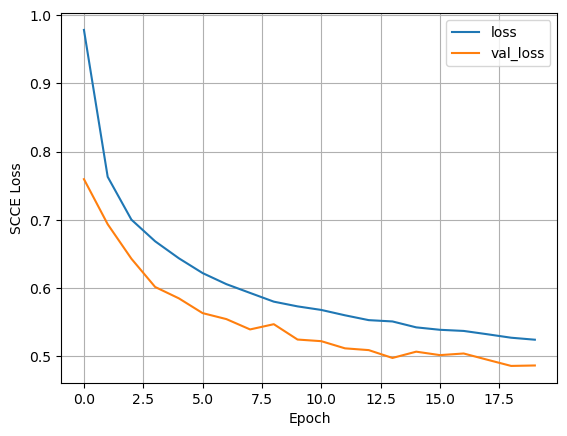

In [41]:
import matplotlib.pyplot as plt

# Graph for the loss.
plt.plot(multiclass_history.history['loss'], label='loss')
plt.plot(multiclass_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)
plt.show()


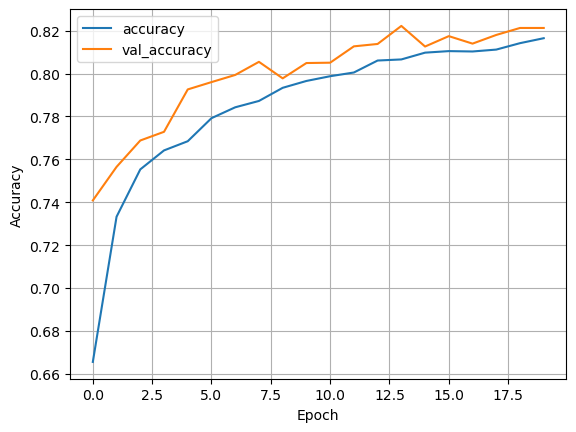

In [42]:
plt.plot(multiclass_history.history['accuracy'], label='accuracy')
plt.plot(multiclass_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Evaluation for Multiclass Classification on the test set
X_test_multiclass = df_test.drop(['label', 'attack_cat'], axis=1).values
y_test_multiclass = df_test['attack_cat'].values
y_test_multiclass = to_categorical(y_test_multiclass, num_classes=len(df_train['attack_cat'].unique()))

# Normalize the test data using the same scaler used for training data
X_test_multiclass = scaler.transform(X_test_multiclass)
X_test_multiclass = X_test_multiclass.reshape(X_test_multiclass.shape[0], X_test_multiclass.shape[1], 1)

multiclass_test_loss, multiclass_test_accuracy = multiclass_model.evaluate(X_test_multiclass, y_test_multiclass)
print(f"Multiclass Classification Test Accuracy: {multiclass_test_accuracy}")

C:\Users\ADMIN\anaconda3_new\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



3367/3367 [==============================] - 10s 3ms/step - loss: 0.7929 - accuracy: 0.7115
Multiclass Classification Test Accuracy: 0.7114534974098206


The test accuracy of 70.76% indicates how well the trained multiclass classification model generalizes to unseen data. A higher accuracy suggests better generalization, while a lower accuracy might indicate issues with overfitting or the model's inability to handle the complexity of the test data. Further analysis and fine-tuning may be required to improve the model's performance.

3367/3367 [==============================] - 11s 3ms/step


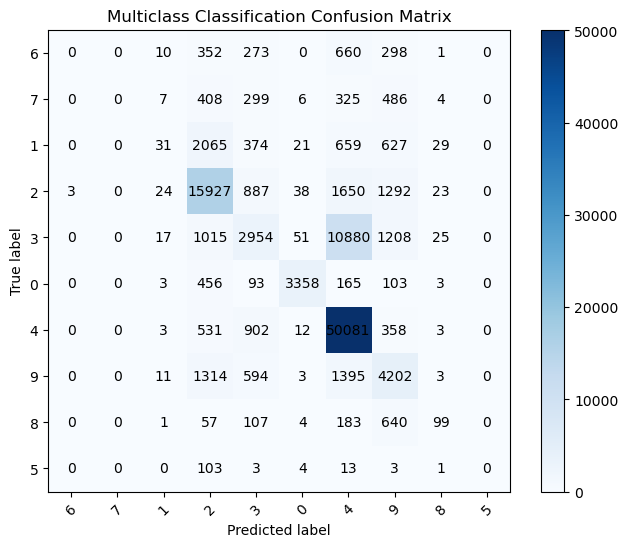

In [68]:
# Multiclass Classification Confusion Matrix
y_pred_multiclass = multiclass_model.predict(X_test_multiclass)
y_pred_multiclass = np.argmax(y_pred_multiclass, axis=1)
y_true_multiclass = np.argmax(y_test_multiclass, axis=1)
cm_multiclass = confusion_matrix(y_true_multiclass, y_pred_multiclass)
plot_confusion_matrix(cm_multiclass, classes=df_equal['attack_cat'].unique(), title='Multiclass Classification Confusion Matrix')


### Binary Classification

In [45]:
# Separate features and labels for binary classification
X_binary = df_equal.drop(['label', 'attack_cat'], axis=1)
y_binary = df_equal['label']

# Normalize the data using Min-Max normalization
scaler = MinMaxScaler()
X_binary = scaler.fit_transform(X_binary)

In [46]:
# Splitting the binary dataset into training (70%) and testing (30%) sets
X_train_binary, X_val_binary, y_train_binary, y_val_binary = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42
)

# Binary Classification CNN Model Architecture
binary_model = Sequential()
binary_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_binary.shape[1], 1)))
binary_model.add(MaxPooling1D(pool_size=2))
binary_model.add(Flatten())
binary_model.add(Dense(128, activation='relu'))
binary_model.add(Dropout(0.5))
binary_model.add(Dense(1, activation='sigmoid'))  # For binary classification, sigmoid is used for activation with 1 output unit

# Compile the binary classification model
binary_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
binary_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 40, 32)            128       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 20, 32)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               82048     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [48]:
# Reshape the input data for the Conv1D layer
X_binary = X_binary.reshape(X_binary.shape[0], X_binary.shape[1], 1)


In [49]:
# Training for Binary Classification
binary_history = binary_model.fit(
    X_train_binary, y_train_binary, validation_data=(X_val_binary, y_val_binary), epochs=20, batch_size=64
)


Epoch 1/20
460/460 [==============================] - 7s 10ms/step - loss: 0.2655 - accuracy: 0.9038 - val_loss: 0.1996 - val_accuracy: 0.9211
Epoch 2/20
460/460 [==============================] - 4s 8ms/step - loss: 0.1964 - accuracy: 0.9228 - val_loss: 0.1769 - val_accuracy: 0.9244
Epoch 3/20
460/460 [==============================] - 3s 7ms/step - loss: 0.1820 - accuracy: 0.9251 - val_loss: 0.1671 - val_accuracy: 0.9248
Epoch 4/20
460/460 [==============================] - 4s 8ms/step - loss: 0.1682 - accuracy: 0.9292 - val_loss: 0.1582 - val_accuracy: 0.9287
Epoch 5/20
460/460 [==============================] - 4s 9ms/step - loss: 0.1584 - accuracy: 0.9306 - val_loss: 0.1427 - val_accuracy: 0.9301
Epoch 6/20
460/460 [==============================] - 4s 9ms/step - loss: 0.1484 - accuracy: 0.9336 - val_loss: 0.1335 - val_accuracy: 0.9353
Epoch 7/20
460/460 [==============================] - 3s 7ms/step - loss: 0.1436 - accuracy: 0.9368 - val_loss: 0.1303 - val_accuracy: 0.9427
Epoch

The model achieves high accuracy, around 95.36% on training data, and 96.04% on validation data. The decreasing loss values indicate learning and optimization during training, while the increasing accuracy shows good performance and generalization to unseen data. Further evaluation on completely unseen test data is needed for a comprehensive assessment has earlier said concerning the muilticlass dataset.

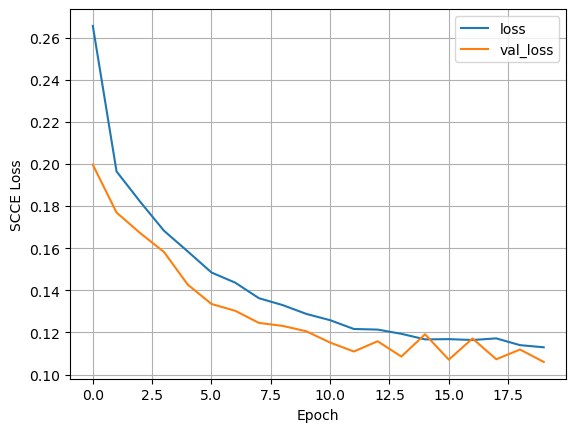

In [50]:
# Graph for the loss
plt.plot(binary_history.history['loss'], label='loss')
plt.plot(binary_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)
plt.show()

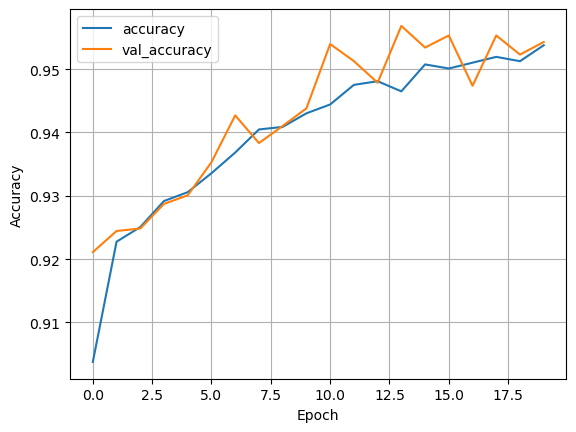

In [51]:
#Graph for the accuracy
plt.plot(binary_history.history['accuracy'], label='accuracy')
plt.plot(binary_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Evaluation for Binary Classification on the test set
X_test_binary = df_test.drop(['label','attack_cat'], axis=1).values
y_test_binary = df_test['label'].values


# Normalize the test data using the same scaler used for training data
X_test_binary = scaler.transform(X_test_binary)
X_test_binary = X_test_binary.reshape(X_test_binary.shape[0], X_test_binary.shape[1], 1)

binary_test_loss, binary_test_accuracy = binary_model.evaluate(X_test_binary, y_test_binary)
print(f"Binary Classification Test Accuracy: {binary_test_accuracy}")


C:\Users\ADMIN\anaconda3_new\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



3367/3367 [==============================] - 12s 4ms/step - loss: 0.2385 - accuracy: 0.8788
Binary Classification Test Accuracy: 0.8788384795188904


The test accuracy of 86.11% indicates how well the binary classification model generalizes to unseen data.

**Note:** The warning message X does not have valid feature names, but MinMaxScaler was fitted with feature names is indicating that the test data does not have column names for the features, while the MinMaxScaler used for normalization during training was fitted with feature names. This warning does not affect the accuracy calculation but suggests that the feature names might be missing in the test data.

3367/3367 [==============================] - 10s 3ms/step


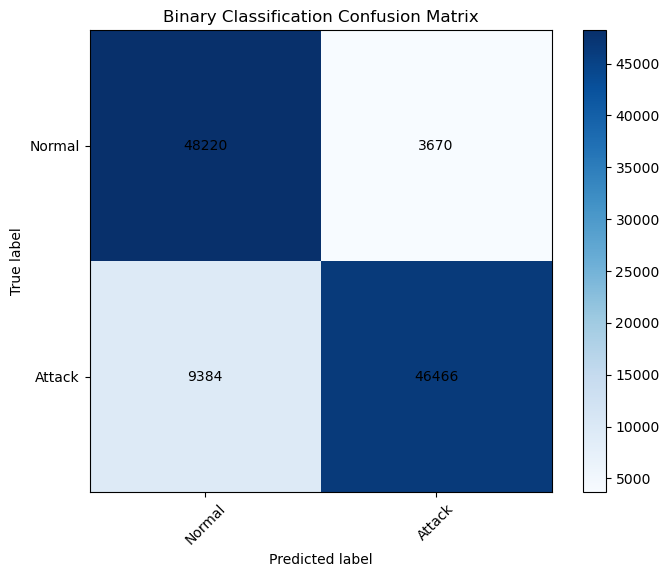

In [69]:
# Binary Classification Confusion Matrix
y_pred_binary = binary_model.predict(X_test_binary)
y_pred_binary = np.round(y_pred_binary)
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)
plot_confusion_matrix(cm_binary, classes=["Normal", "Attack"], title='Binary Classification Confusion Matrix')


### Drive by Download attacks only: "backdoor" and "exploitation"

In [54]:
# Combine "Backdoor" and "Exploits" attacks into a single category called "dbdown"
df_equal['attack_cat'] = np.where((df_equal['attack_cat'] == 'Backdoor') | (df_equal['attack_cat'] == 'Exploits'), 'dbdown', df_equal['attack_cat'])

# Encode categorical features
label_encoder = LabelEncoder()
object_columns = ["proto", "service", "state", "attack_cat"]
for col in object_columns:
    df_equal[col] = label_encoder.fit_transform(df_equal[col])

# Separate features and labels for multiclass classification
X_driveby = df_equal.drop(['label', 'attack_cat'], axis=1)
y_driveby = df_equal['attack_cat']

# Convert the labels to one-hot encoded vectors for multiclass
y_driveby = to_categorical(y_driveby, num_classes=len(df_equal['attack_cat'].unique()))



In [55]:
# Normalize the data using Min-Max normalization
scaler = MinMaxScaler()
X_driveby = scaler.fit_transform(X_driveby)

# Reshape the input data for the Conv1D layer
X_driveby = X_driveby.reshape(X_driveby.shape[0], X_driveby.shape[1], 1)

# Splitting the driveby dataset into training (70%) and testing (30%) sets
X_train_driveby, X_val_driveby, y_train_driveby, y_val_driveby = train_test_split(
    X_driveby, y_driveby, test_size=0.3, random_state=42
)



In [56]:
# Driveby Classification CNN Model Architecture
driveby_model = Sequential()
driveby_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_driveby.shape[1], 1)))
driveby_model.add(MaxPooling1D(pool_size=2))
driveby_model.add(Flatten())
driveby_model.add(Dense(128, activation='relu'))
driveby_model.add(Dropout(0.5))
driveby_model.add(Dense(len(df_equal['attack_cat'].unique()), activation='softmax'))

In [57]:
# Compile the driveby classification model
driveby_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [58]:
# Training for Driveby Classification
driveby_history = driveby_model.fit(
    X_train_driveby, y_train_driveby, validation_data=(X_val_driveby, y_val_driveby), epochs=20, batch_size=64
)


Epoch 1/20
460/460 [==============================] - 5s 7ms/step - loss: 0.9937 - accuracy: 0.6625 - val_loss: 0.7677 - val_accuracy: 0.7244
Epoch 2/20
460/460 [==============================] - 3s 8ms/step - loss: 0.7752 - accuracy: 0.7286 - val_loss: 0.6997 - val_accuracy: 0.7476
Epoch 3/20
460/460 [==============================] - 4s 9ms/step - loss: 0.7162 - accuracy: 0.7477 - val_loss: 0.6444 - val_accuracy: 0.7717
Epoch 4/20
460/460 [==============================] - 4s 9ms/step - loss: 0.6786 - accuracy: 0.7624 - val_loss: 0.6131 - val_accuracy: 0.7778
Epoch 5/20
460/460 [==============================] - 4s 8ms/step - loss: 0.6522 - accuracy: 0.7678 - val_loss: 0.5884 - val_accuracy: 0.7811
Epoch 6/20
460/460 [==============================] - 3s 7ms/step - loss: 0.6300 - accuracy: 0.7745 - val_loss: 0.5702 - val_accuracy: 0.7834
Epoch 7/20
460/460 [==============================] - 4s 9ms/step - loss: 0.6206 - accuracy: 0.7782 - val_loss: 0.5617 - val_accuracy: 0.7945
Epoch 

The multiclass classification model is trained for 20 epochs using a neural network. The model's training accuracy increases gradually while the validation accuracy improves up to around 81.60%. The training loss decreases as the model learns from the data.

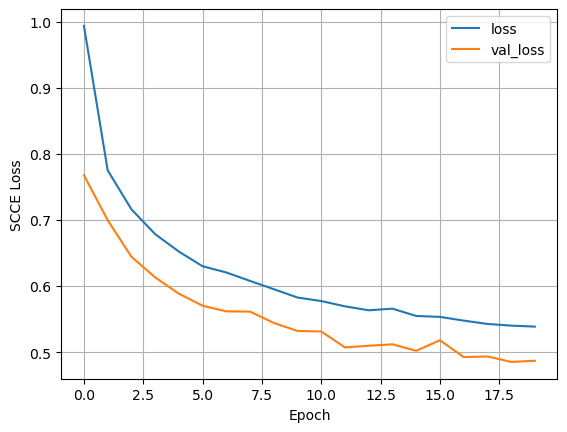

In [59]:
# Graph for the loss
plt.plot(driveby_history.history['loss'], label='loss')
plt.plot(driveby_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)
plt.show()


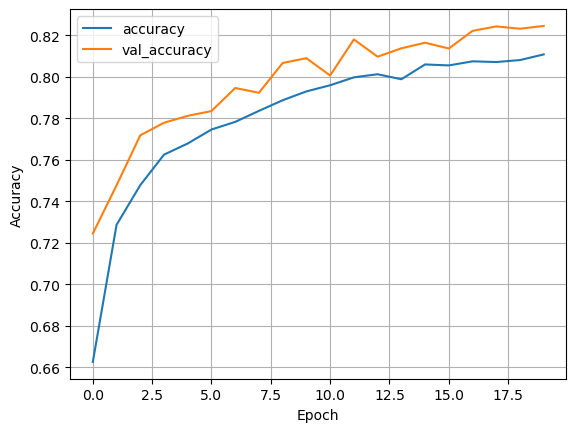

In [60]:
# Graph for the accuracy
plt.plot(driveby_history.history['accuracy'], label='accuracy')
plt.plot(driveby_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


394/394 [==============================] - 1s 2ms/step


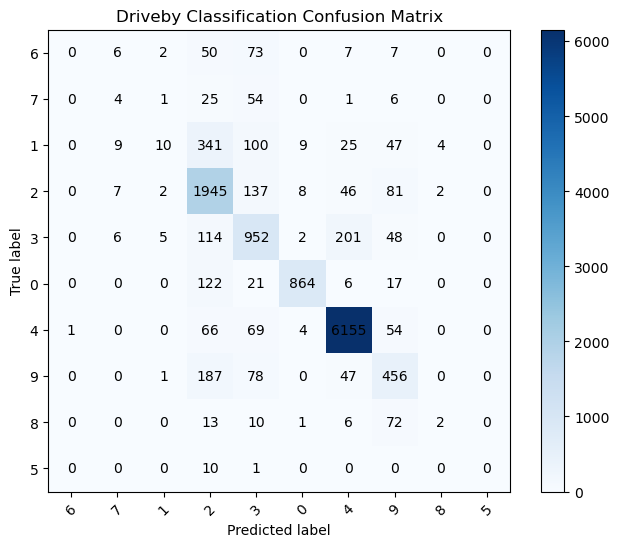

In [70]:
# Driveby Classification Confusion Matrix
y_pred_driveby = driveby_model.predict(X_val_driveby)
y_pred_driveby = np.argmax(y_pred_driveby, axis=1)
y_true_driveby = np.argmax(y_val_driveby, axis=1)
cm_driveby = confusion_matrix(y_true_driveby, y_pred_driveby)
plot_confusion_matrix(cm_driveby, classes=df_equal['attack_cat'].unique(), title='Driveby Classification Confusion Matrix')

## HYPERPARAMETER TUNING

In [62]:
# Defined a function to build the model
def build_multiclass_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=16, max_value=128, step=16),
                     kernel_size=hp.Choice('kernel_size', values=[3, 5]),
                     activation='relu', input_shape=(X_train_multiclass.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(df_train['attack_cat'].unique()), activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [63]:
# Split the multiclass dataset into training and validation sets
X_train_multiclass, X_val_multiclass, y_train_multiclass, y_val_multiclass = train_test_split(
    X_multiclass, y_multiclass, test_size=0.3, random_state=42
)



In [64]:
# Instantiate the RandomSearch tuner
tuner = RandomSearch(
    build_multiclass_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='tuner_results',  # Directory to store tuning results
    project_name='multiclass_tuning'
)

INFO:tensorflow:Reloading Tuner from tuner_results\multiclass_tuning\tuner0.json


In [65]:
# Start the hyperparameter search
tuner.search(X_train_multiclass, y_train_multiclass, validation_data=(X_val_multiclass, y_val_multiclass), epochs=20, batch_size=64)

# Get the best hyperparameters and build the final model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

INFO:tensorflow:Oracle triggered exit


In [66]:
# Train the final model using the best hyperparameters
final_history = best_model.fit(
    X_train_multiclass, y_train_multiclass, validation_data=(X_val_multiclass, y_val_multiclass),
    epochs=20, batch_size=64
)

Epoch 1/20
460/460 [==============================] - 11s 20ms/step - loss: 0.8872 - accuracy: 0.6929 - val_loss: 0.7179 - val_accuracy: 0.7488
Epoch 2/20
460/460 [==============================] - 9s 19ms/step - loss: 0.7105 - accuracy: 0.7497 - val_loss: 0.6498 - val_accuracy: 0.7696
Epoch 3/20
460/460 [==============================] - 8s 18ms/step - loss: 0.6547 - accuracy: 0.7664 - val_loss: 0.5934 - val_accuracy: 0.7860
Epoch 4/20
460/460 [==============================] - 9s 20ms/step - loss: 0.6175 - accuracy: 0.7774 - val_loss: 0.5601 - val_accuracy: 0.7853
Epoch 5/20
460/460 [==============================] - 9s 20ms/step - loss: 0.5894 - accuracy: 0.7893 - val_loss: 0.5417 - val_accuracy: 0.8050
Epoch 6/20
460/460 [==============================] - 8s 18ms/step - loss: 0.5695 - accuracy: 0.7956 - val_loss: 0.5218 - val_accuracy: 0.8116
Epoch 7/20
460/460 [==============================] - 9s 19ms/step - loss: 0.5547 - accuracy: 0.8025 - val_loss: 0.5100 - val_accuracy: 0.816